# Qiskit-Terra introduction
by Luciano, Qiskit-Terra developer

 - Github: [1ucian0](https://github.com/1ucian0)
 - Twitter: [@microluciano](https://twitter.com/microluciano/)
 - Linkedin: [1ucian0](https://www.linkedin.com/in/1ucian0/)

In [1]:
%matplotlib inline
# standard-ish Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ

# about transpiling, compiling, and executing
from qiskit.compiler import transpile

# For graphs
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Aer noise models
from qiskit.providers.aer import noise

ModuleNotFoundError: No module named 'matplotlib'

## Circuit building

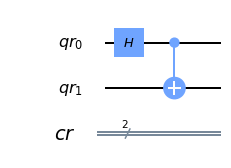

In [2]:
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.draw()

In [3]:
circuit.draw(output='text')

In [4]:
# Run the quantum circuit on a statevector simulator backend
sv_simulator = Aer.get_backend('statevector_simulator')

# Execute the circuit
job = execute(circuit, sv_simulator)

# Get the result
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
outputstate

array([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j])

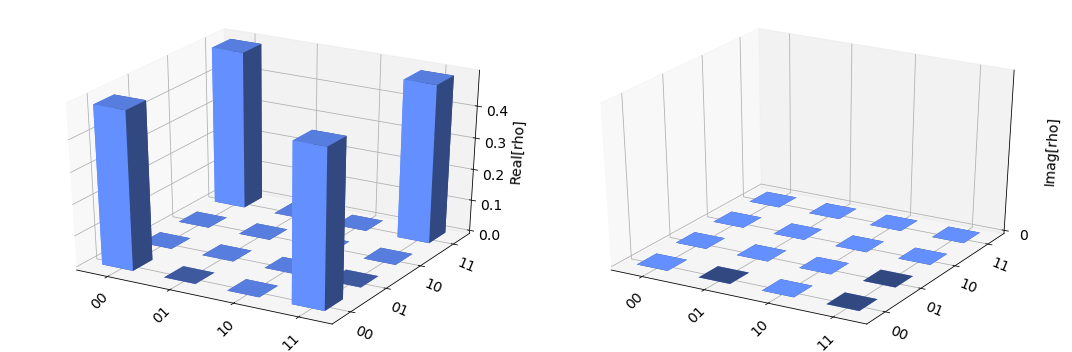

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

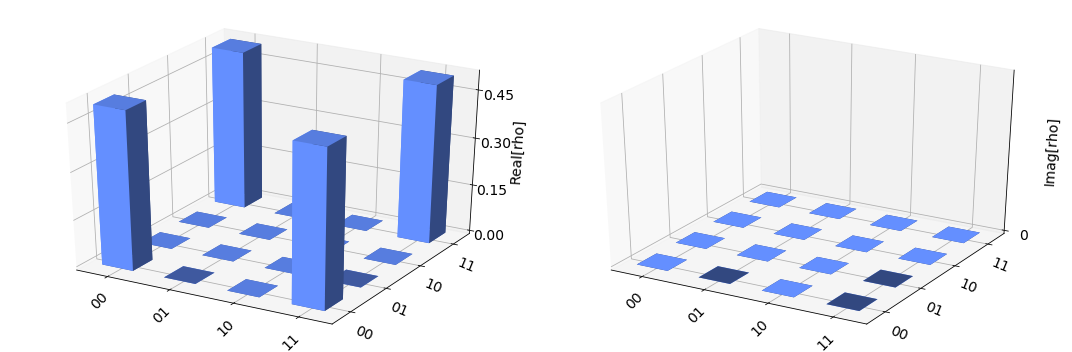

In [6]:
from qiskit.quantum_info import Statevector
outputstate = Statevector.from_instruction(circuit)
plot_state_city(outputstate.data)

## The effect of measuring

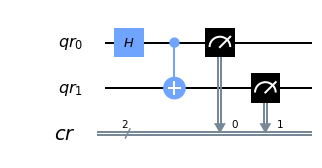

In [7]:
circuit.measure(qr, cr)
circuit.draw()

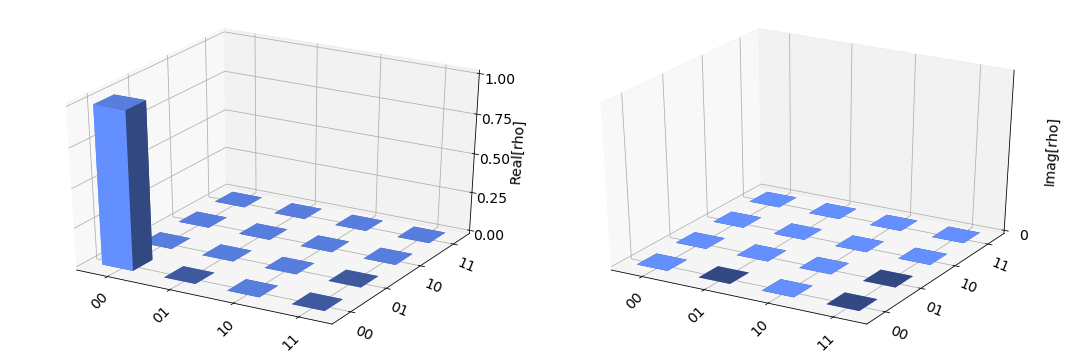

In [8]:
job = execute(circuit, sv_simulator)

# Get the result
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)

plot_state_city(outputstate)

In [9]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = execute(circuit, simulator, shots=1024)

# Grab the results from the job.
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'11': 500, '00': 524}


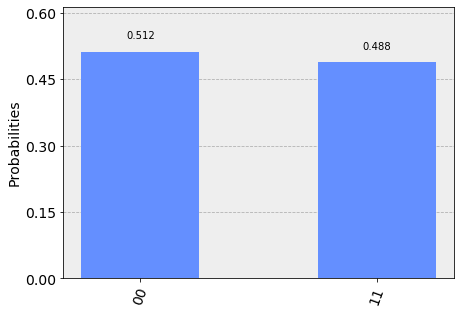

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Remote Backends

In [11]:
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmq_simulator = IBMQ.get_provider().get_backend('ibmq_qasm_simulator')

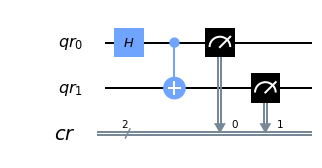

In [12]:
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw()

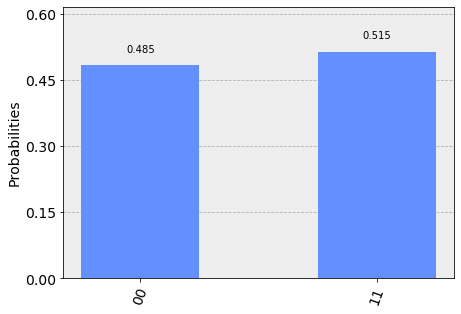

In [13]:
job = execute(circuit, ibmq_simulator)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

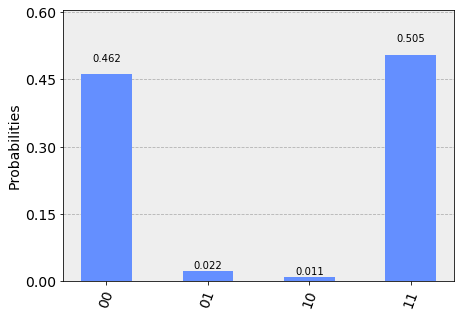

In [14]:
ibmqx2 = IBMQ.get_provider().get_backend('ibmqx2')

job = execute(circuit, ibmqx2)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

## More about remote backends

In [15]:
%qiskit_backend_overview

In [16]:
ibmqx2

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

## Simulating noise in the local simulator

In [17]:
properties = ibmqx2.properties()
coupling_map = ibmqx2.configuration().coupling_map
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

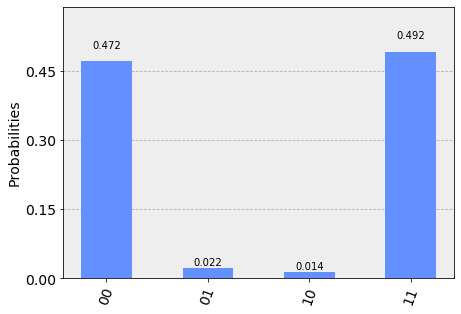

In [18]:
job = execute(circuit, simulator,
              coupling_map=coupling_map,
              noise_model=noise_model,
              basis_gates=basis_gates)
counts = job.result().get_counts()
circuit.draw()
plot_histogram(counts)

## Transpiler and its effects

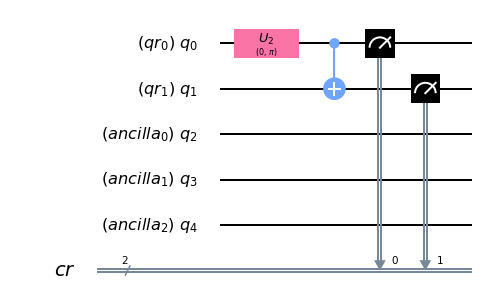

In [19]:
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

transpiled = transpile(circuit, backend=ibmqx2)

transpiled.draw()

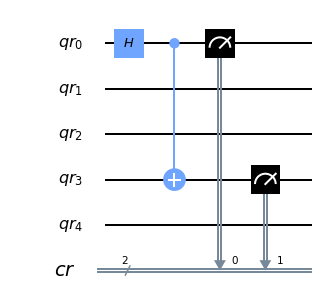

In [20]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(2, 'cr')
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[3])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[3], cr[1])
circuit.draw()

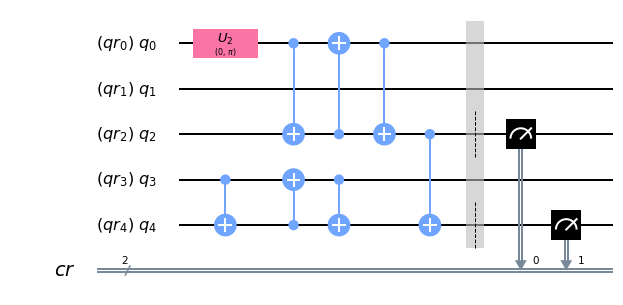

In [21]:
transpiled = transpile(circuit, backend=ibmqx2)
transpiled.draw()

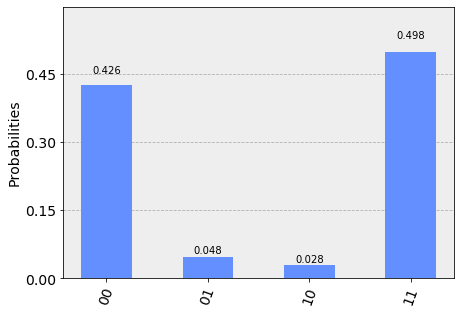

In [22]:
job = execute(transpiled, ibmqx2)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

## Optimization Levels

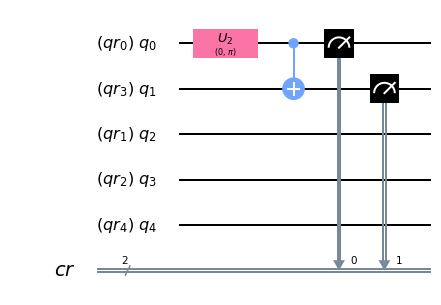

In [23]:
transpiled = transpile(circuit, backend=ibmqx2, optimization_level=3)
transpiled.draw()

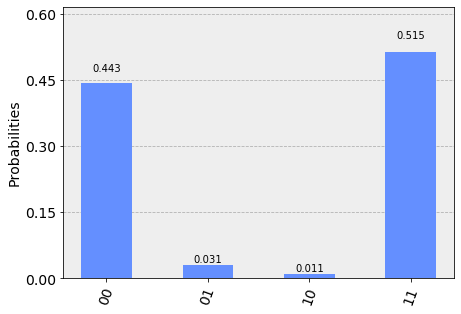

In [24]:
job = execute(transpiled, ibmqx2, optimization_level=3)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)